# Loading the Dataset

The code submitted explains how text data can be read and prepared from a set of files and for model consumption. It begins by setting the file path for a dataset stored locally, specifically in the directory `C:From the analysis of MyFrame it can be identified that TXT files derived from \dataset\AT1 dataset_AusRadioTalkback. The code makes use of the built-in ‘glob’ to get paths of all text files from the specified directory and then stores them in a list called `file_list`. It then goes to the next file, open it, read its content and writes the text in a list called ‘texts’. Last of all, the code creates a pandas DataFrame, where every row represents a file and columns are its name and text respectively. The DataFrame format of the data makes it easier to work on the text data, hence through the head() function, the first few rows of data collected are shown.

In [1]:
import os
import glob
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Set the path to the dataset
dataset_path = r'C:\dataset\AT1 dataset_AusRadioTalkback'

# Load all text files into a list
file_list = glob.glob(os.path.join(dataset_path, '*.txt'))
texts = []

# Read each file and append its content to the list
for file in file_list:
    with open(file, 'r', encoding='utf-8') as f:
        texts.append(f.read())

# Create a DataFrame to hold the data
df = pd.DataFrame({'file_name': file_list, 'text': texts})

# Display the first few rows of the DataFrame
df.head()


file_name  \
0  C:\dataset\AT1 dataset_AusRadioTalkback\ABCE1-...   
1  C:\dataset\AT1 dataset_AusRadioTalkback\ABCE2-...   
2  C:\dataset\AT1 dataset_AusRadioTalkback\ABCE3-...   
3  C:\dataset\AT1 dataset_AusRadioTalkback\ABCE4-...   
4  C:\dataset\AT1 dataset_AusRadioTalkback\ABCNE1...   

                                                text  
0   Thanks for that John Hall now John Hall will ...  
1   Ah look l Les Pete.\n.\n Simon.\n G'day Peto....  
2   If you haven't been with us before this how i...  
3   Uh blue-tongues'd be  unlikely to eat them be...  
4   A very good afternoon to you Roly.\n Good aft...

In [2]:
# List all files in the folder
files = os.listdir(dataset_path)

# Filter out only the files (excluding directories)
file_count = len([f for f in files if os.path.isfile(os.path.join(dataset_path, f))])

# Print the number of files
print(f'There are {file_count} files in the folder.')

There are 29 files in the folder.


# Exploring the Data

The following code allows to make an exploratory analysis of the provided files by considering the distribution of the length of the texts. First, it determines the size of every transcript where the number of characters in the text file is counted. These lengths are stored in a new column that is created with the name as text_length. The basic measures like mean, median and standard deviation are calculated in order to provide the general information about the size of the text produced within the transcripts.

Following that, the code generates a histogram of text lengths with 20 bin range, which has a KDE curve for reference. This histogram shows how the length of the transcripts is distributed among the dataset and allows to decide if there are large discrepancies in the data or not. To increase readability and to describe the trends shown in the visualization, the chart is supplemented with the title and axis labels.

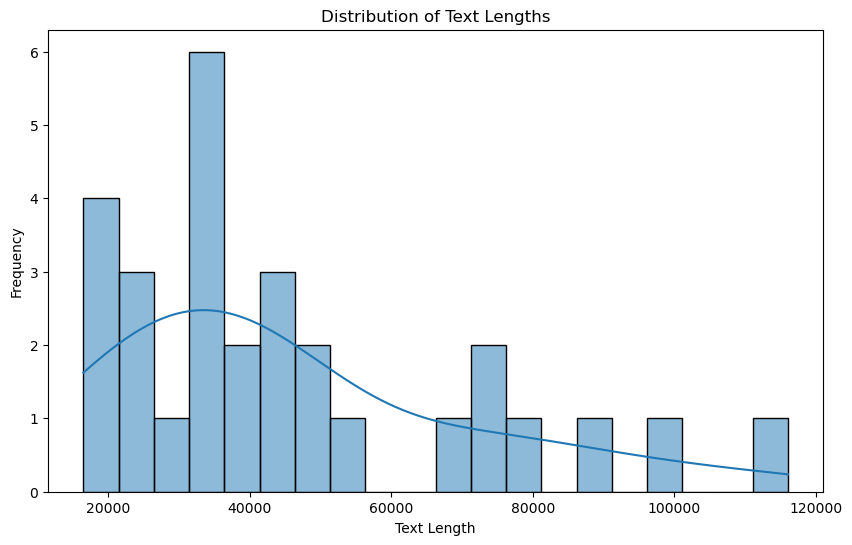

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the number of files and their distribution
df['file_name'].apply(lambda x: os.path.basename(x)).value_counts()

# Display basic statistics about the text lengths
df['text_length'] = df['text'].apply(len)
df['text_length'].describe()

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], kde=True, bins=20)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


# Analyzing the Text Data

In this code segment, word frequency analysis is done with the help of `CountVectorizer` which is from `sklearn`. The `CountVectorizer` excludes basic English words that usually do not contribute much to the meaning of documents, and the input text data is represented as token count vectors. Rows refer to an individual document from the dataset of documents, while columns are the words within the same data set.

The matrix is also converted to DataFrame for better understanding and ease of read as well as manipulation. The counts of all the words in all documents are then added together to determine which words are the most repeated. Last of all, it prints out the twenty most frequently used words and phrases in the data set, which gives some idea of the language used in the Australian Radio talkback transcripts.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Word frequency analysis using CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
word_counts = count_vectorizer.fit_transform(df['text'])

# Convert to DataFrame for better readability
word_counts_df = pd.DataFrame(word_counts.toarray(), columns=count_vectorizer.get_feature_names_out())

# Sum up the word counts across all documents
total_word_counts = word_counts_df.sum().sort_values(ascending=False)

# Display the top 20 most frequent words
top_words = total_word_counts.head(20)
top_words


uh        5100
um        2699
just      1717
know      1708
yeah      1485
ve        1469
like      1234
think     1206
oh        1051
good      1046
got        964
yes        788
ll         772
don        771
people     716
really     714
okay       706
say        564
time       536
look       530
dtype: int64

# Manipulating the Text Data

The code snippet below considerable for doing some text preprocessing that is necessary and crucial for the data analysis process. It starts by first transforming all the string to lower cases by the use of the `str. smaller() function, which makes the code more consistent and does not introduce redundancy because of the difference in the case of the names. After this, it eliminates the punctuation marks from the text using the ‘’. replace() function to use a regular expression and match any character that is not a word character or whitespace character. This step assists to delete symbols that are inconsequential or are not going to be useful towards the analysis.

In [5]:
# Perform basic text preprocessing: lowercasing, removing punctuation, and numbers
df['cleaned_text'] = df['text'].str.lower()
df['cleaned_text'] = df['cleaned_text'].str.replace('[^\w\s]', '', regex=True)
df['cleaned_text'] = df['cleaned_text'].str.replace('\d+', '', regex=True)

# Check the cleaned text
df['cleaned_text'].head()


0     thanks for that john hall now john hall will ...
1     ah look l les pete\n\n simon\n gday peto\n si...
2     if you havent been with us before this how it...
3     uh bluetonguesd be  unlikely to eat them beca...
4     a very good afternoon to you roly\n good afte...
Name: cleaned_text, dtype: object

# Visualizing the Data

Word frequency analysis was carried out on the data obtained from the radio talkback transcripts dataset to generate a word cloud. This visualization is similar to the previous one but in addition to the position and fonts, words are presented in the sizes depending on their importance in the text. The word cloud generated was sourced from the WordCloud module in python language where all the text data that was cleaned were joined together as a string and analyzed. This makes the resulting image rather self-explanatory, as it gives a fast and rather easy indication of the most discussed terms and therefore of the temporal topics and tendencies.

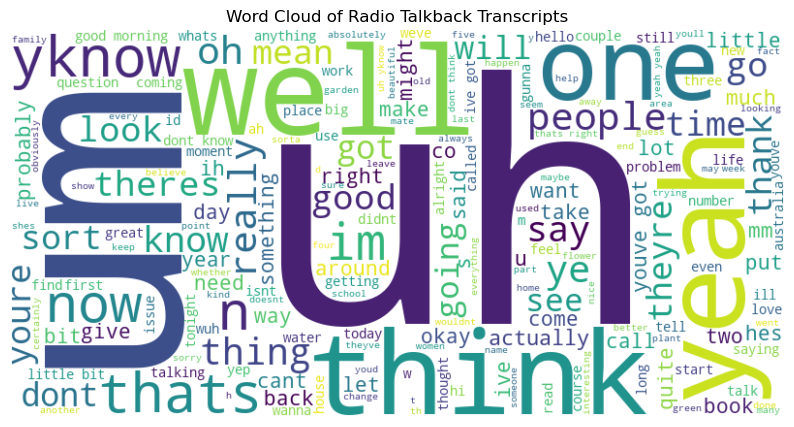

In [6]:
from wordcloud import WordCloud

# Generate a word cloud for the entire dataset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Radio Talkback Transcripts')
plt.show()

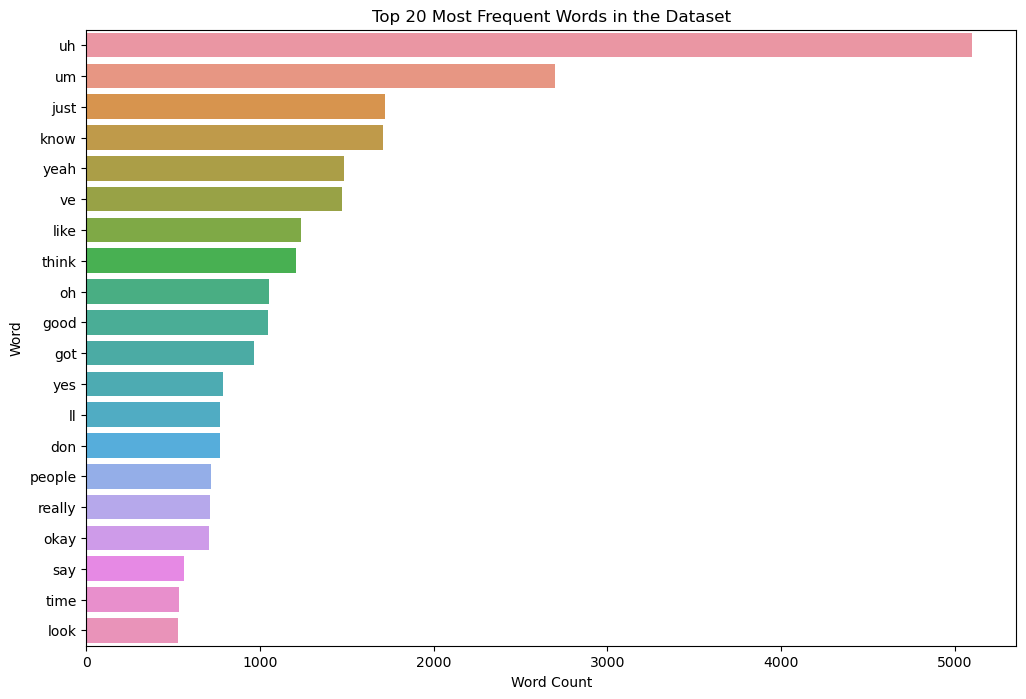

In [7]:
# Visualize the top 20 words in a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_words.values, y=top_words.index)
plt.title('Top 20 Most Frequent Words in the Dataset')
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.show()

The bar chart below shows the analysis of the 20 most frequently used words and phrases in the dataset of Australian radio talkback transcripts. The x-axis shouldcontain numbers indicating the frequency of words’ occurrence while the y-axis should list the words themselves. This way the most frequently used words that can be helpful in understanding the topics discussed in the text files are highlighted. Except for stopwords, the terms identified as frequent in the text analysis are valuable since the analysis is interested in suggesting the main ideas that construct the vocabulary background of the dataset.

# Interpreting the Results: Calculating and Visualizing TF-IDF Scores

The provided code compute and plot Term Frequency-Inverse Document Frequency (TF-IDF) for the given text corpus. As a first step, the ‘TfidfVectorizer’ is used which performs a transformation on the clean text data, converting it into a TF-IDF matrix that represents the significance of each word with respect to all the documents. This matrix is then converted to DataFrame for easy analysis so as to respond to the Pope’s call for innovation and effective execution of projects. The presented code establishes the average of the TF-IDF score of each word in the case of each document and finds out the top twenty words which have got the highest scores.

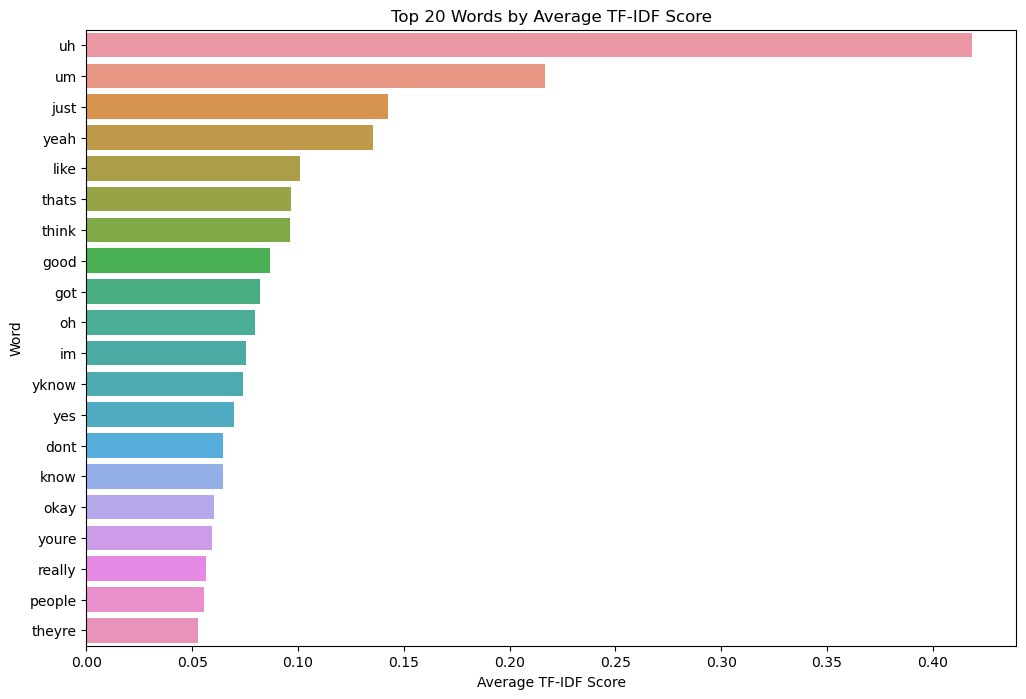

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate TF-IDF scores for the corpus
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert to DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the top 20 words with the highest average TF-IDF scores
average_tfidf_scores = tfidf_df.mean().sort_values(ascending=False).head(20)
average_tfidf_scores

# Visualize the TF-IDF scores
plt.figure(figsize=(12, 8))
sns.barplot(x=average_tfidf_scores.values, y=average_tfidf_scores.index)
plt.title('Top 20 Words by Average TF-IDF Score')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Word')
plt.show()


# Tokenization

The code applies two functions from the NLTK library to split the text after the cleaning phase: `word_tokenize()`, which splits the text into words, and `sent_tokenize()`, which splits the text into sentences. Every text in the dataset is pre-processed and two new variables are created: ‘WordTokens’ and ‘SentenceTokens’. The last line of print out shows the five or such tokenized result, giving some idea of how the text has been broken down into words and sentences for further analysis.

In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize

# Tokenize the text into words and sentences
df['word_tokens'] = df['cleaned_text'].apply(word_tokenize)
df['sentence_tokens'] = df['cleaned_text'].apply(sent_tokenize)

# Display tokenized words and sentences 
df[['word_tokens', 'sentence_tokens']].head(5)


word_tokens  \
0  [thanks, for, that, john, hall, now, john, hal...   
1  [ah, look, l, les, pete, simon, gday, peto, si...   
2  [if, you, havent, been, with, us, before, this...   
3  [uh, bluetonguesd, be, unlikely, to, eat, them...   
4  [a, very, good, afternoon, to, you, roly, good...   

                                     sentence_tokens  
0  [ thanks for that john hall now john hall will...  
1  [ ah look l les pete\n\n simon\n gday peto\n s...  
2  [ if you havent been with us before this how i...  
3  [ uh bluetonguesd be  unlikely to eat them bec...  
4  [ a very good afternoon to you roly\n good aft...

# Lemmatization/Stemming

The code also includes the creation of lemmatizer and stemmer to extract the root forms of the word from the dataset’s tokenized words. Lemmatization is used to map the words to their dictionary form by removing all affixes from them whereas stemming is used to chop words into root or base form by erasing the suffixes. The lemmatized and stemmed words are stored in the columns `lemmatized_text` and `stemmed_text` after performing the lemmatization and stemming. The last line of these columns shows the last five rows of them where you can see the lemmatized tokens as well as the stemmed tokens.

In [10]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Apply lemmatization
df['lemmatized_text'] = df['word_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# Apply stemming
df['stemmed_text'] = df['word_tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

# Display lemmatized and stemmed text
df[['lemmatized_text', 'stemmed_text']].tail(5)


lemmatized_text  \
24  [eighteen, minute, past, ten, eighteen, past, ...   
25  [so, now, it, welcome, first, to, our, expert,...   
26  [youre, with, mel, in, the, morning, it, fourt...   
27  [five, a, m, in, new, york, hey, there, got, t...   
28  [hello, and, welcome, to, the, chatroom, with,...   

                                         stemmed_text  
24  [eighteen, minut, past, ten, eighteen, past, n...  
25  [so, now, it, welcom, first, to, our, expert, ...  
26  [your, with, mel, in, the, morn, it, fourteen,...  
27  [five, a, m, in, new, york, hey, there, got, t...  
28  [hello, and, welcom, to, the, chatroom, with, ...

# Named Entity Recognition (NER)

This code snippet is as follows that shows the feature to extract named entity from the text data using TextBlob. The following function is first defined to understand the text and extract noun phrases which are usually the entities. Using this function on the `cleaned_text` column of a DataFrame produces a new column ‘entities’ that is a list of noun phrases for each document. The last step of the code prints out the `file_name` and the related `entities` column of the DataFrame. 

In [18]:
from textblob import TextBlob
import pandas as pd

# Example DataFrame setup (Replace this with your actual DataFrame loading)
# df = pd.DataFrame({'text': ['Sample text with entity London and organization Microsoft.']})

# Define a function to extract named entities using TextBlob
def extract_entities(text):
    blob = TextBlob(text)
    entities = blob.noun_phrases
    return entities

# Apply the NER function to the cleaned text
df['entities'] = df['cleaned_text'].apply(extract_entities)

# Display extracted entities
df[['file_name', 'entities']].head()


file_name  \
0  C:\dataset\AT1 dataset_AusRadioTalkback\ABCE1-...   
1  C:\dataset\AT1 dataset_AusRadioTalkback\ABCE2-...   
2  C:\dataset\AT1 dataset_AusRadioTalkback\ABCE3-...   
3  C:\dataset\AT1 dataset_AusRadioTalkback\ABCE4-...   
4  C:\dataset\AT1 dataset_AusRadioTalkback\ABCNE1...   

                                            entities  
0  [john hall, john hall, hour cos angus stewart,...  
1  [ah look l les pete simon gday peto simo, gday...  
2  [functions jurate sasnaitis joins, book club g...  
3  [uh bluetonguesd, good old uh hemidactylus, as...  
4  [good afternoon, good afternoon sir mm good, c...

# Sentiment Analysis

In this analysis the TextBlob library is used to calculate sentiment scores for each document in the dataset. The TextBlob function involves passing the cleaned_text of each transcript through polarity to find out whether it has a positive or negative sentiment or subjectivity which is the extent of personal rants. The results which are the sentiments of the reviews are stored in the DataFrame but under the new sentiment column. The first result gives the details of the first ten documents they were analyzed along with the look up results of sentiment score which gives the over tone analysis of the radio talkback transcripts.

In [20]:
from textblob import TextBlob

# Perform sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment)

# Display sentiment analysis results for the first document
df[['file_name', 'sentiment']].head(10)


file_name  \
0  C:\dataset\AT1 dataset_AusRadioTalkback\ABCE1-...   
1  C:\dataset\AT1 dataset_AusRadioTalkback\ABCE2-...   
2  C:\dataset\AT1 dataset_AusRadioTalkback\ABCE3-...   
3  C:\dataset\AT1 dataset_AusRadioTalkback\ABCE4-...   
4  C:\dataset\AT1 dataset_AusRadioTalkback\ABCNE1...   
5  C:\dataset\AT1 dataset_AusRadioTalkback\ABCNE2...   
6  C:\dataset\AT1 dataset_AusRadioTalkback\COME1-...   
7  C:\dataset\AT1 dataset_AusRadioTalkback\COME2-...   
8  C:\dataset\AT1 dataset_AusRadioTalkback\COME3-...   
9  C:\dataset\AT1 dataset_AusRadioTalkback\COME4-...   

                                    sentiment  
0   (0.14358719054737712, 0.4699890496877584)  
1     (0.1457683364812274, 0.459008609181135)  
2   (0.14627617430673484, 0.5278451505106851)  
3  (0.11949267534633388, 0.44278445712243614)  
4   (0.09415872210227054, 0.4514651492474075)  
5   (0.16363070641479746, 0.4706394040863738)  
6   (0.19335702144542566, 0.5153019149571552)  
7   (0.14348862690233255, 0.4669208156010184)  
8   (0.13983029471943853, 0.4786541049843804)  
9   (0.10609376581764325, 0.4909233591543405)

# Topic Modeling (LDA)

The code applies text mining and specifically the Latent Dirichlet Allocation (LDA) on a text data set. First, the cleaned text data is processed with the help of `CountVectorizer`, which transforms text data into the TD-IDF matrix: `max_df = 0.7` and `min_df = 5` are used to filter stop words; `stop_words = ‘english’` is used to filter out common English stop words. Secondly, a model with 5 topic components is then used to conduct a text analysis on the data. The code then selects the ten most frequent words for each topic that gives an insight of the topics that exist in the text corpus. It provides the analysis of documents by revealing which topics were mostly discussed through popular words related to these topics.

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for LDA
lda_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
lda_data = lda_vectorizer.fit_transform(df['cleaned_text'])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(lda_data)

# Display the top words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Top words for topic #{i}:")
    print([lda_vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print("\n")


Top words for topic #0:
['footy', 'hello', 'night', 'playing', 'wuh', 'ball', 'players', 'game', 'mate', 'hes']


Top words for topic #1:
['tony', 'government', 'world', 'believe', 'need', 'saying', 'john', 'mm', 'australia', 'women']


Top words for topic #2:
['didnt', 'children', 'reading', 'mm', 'id', 'old', 'school', 'books', 'read', 'book']


Top words for topic #3:
['didnt', 'problem', 'doctor', 'probably', 'quite', 'hes', 'house', 'today', 'year', 'morning']


Top words for topic #4:
['id', 'morning', 'tonight', 'number', 'youll', 'new', 'love', 'need', 'water', 'year']




# N-grams Analysis

During the analysis, the bigrams which are two successive words were created out of the cleaned up textual data. These bigrams were created with the help of the `ngrams’ function available in the `nltk’ library. The identified bigrams in each document were compiled to a unique Bigram list. The `Counter` class from the `collections` module was then used to determine the frequency of the bigram. Finally the ten most frequent bigrams were identified, this gave an understanding of the most frequently used word combinations in the corpus. This method involves identifying the regularity of Phrases and they can be used to identify the patterns of the text data.

In [22]:
from collections import Counter
from nltk import ngrams

# Generate bigrams (2-grams) for the entire corpus
df['bigrams'] = df['cleaned_text'].apply(lambda x: list(ngrams(word_tokenize(x), 2)))

# Flatten the list of bigrams and count their frequency
all_bigrams = [bigram for sublist in df['bigrams'] for bigram in sublist]
bigram_counts = Counter(all_bigrams)

# Display the top 10 most common bigrams
bigram_counts.most_common(10)


[(('of', 'the'), 815),
 (('i', 'think'), 803),
 (('in', 'the'), 771),
 (('and', 'i'), 564),
 (('on', 'the'), 489),
 (('sort', 'of'), 449),
 (('and', 'uh'), 440),
 (('i', 'i'), 406),
 (('i', 'mean'), 405),
 (('it', 'was'), 405)]